# 3

In [1]:
import pandas as pd
import numpy as np
import wooldridge as woo
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from simple_colors import *
from RegscorePy import mallow
from sklearn.model_selection import KFold
import warnings 
warnings.filterwarnings('ignore')

## PART 1

### Use the WAGE1 dataset from the Wooldridge python module to answer the following question. Import this data into your notebook.

In [2]:
wage = woo.data("wage1")
wage.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


### Consider the following model: 
### log(wage) = β0 + β1educ + β2exper + β3tenure + β4female + β5married + β6numdep
### are the residuals from this regression normally distributed? Use a statistical test to support your conclusion.

In [3]:
wreg = smf.ols('np.log(wage) ~ educ + exper + tenure + female + married + numdep', data=wage)
wresult = wreg.fit()
wresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     58.54
Date:                Sun, 30 Oct 2022   Prob (F-statistic):           3.15e-55
Time:                        20:22:52   Log-Likelihood:                -277.50
No. Observations:                 526   AIC:                             569.0
Df Residuals:                     519   BIC:                             598.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4894      0.109      4.492      0.000       0.275       0.703
educ           0.0839      0.007     11.534      0.000       0.070       0.098
exper          0.0031      0.002      1.830      0.068      -0.000       0.007
tenure         0.0169      0.003      5.700      0.000       0.011       0.023
female        -0.2856      0.037     -7.648      0.000      -0.359      -0.212
married        0.1256      0.041      3.046      0.002       0.045       0.207
numdep         0.0003      0.015      0.018      0.986      -0.030       0.030
==============================================================================
Omnibus:                       11.872   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               21.133
Skew:                           0.071   Prob(JB):                     2.58e-05
Kurtosis:                       3.972   Cond. No.                         151.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
stats.jarque_bera(wresult.resid)

Jarque_beraResult(statistic=21.133269206920836, pvalue=2.576136668841489e-05)

We reject $ H_{0} $, the residuals are not normally distributed.

### On a single plot show the fitted values, observed values, prediction interval, and confidence interval from the regression in part (a). Use exper as the variable on the x-axis. (Hint: A range of x-values needs to be included in a dataframe for each dependent variable used in the regression. This new data is used in get prediction).

In [5]:
xrange = np.linspace(wage.educ.min(), wage.educ.max(), 500)
xrange1 = np.linspace(wage.exper.min(), wage.exper.max(), 500)
xrange2 = np.linspace(wage.tenure.min(), wage.tenure.max(), 500)
xrange3 = np.linspace(wage.female.min(), wage.female.max(), 500)
xrange4 = np.linspace(wage.married.min(), wage.married.max(), 500)
xrange5 = np.linspace(wage.numdep.min(), wage.numdep.max(), 500)

new_wage = pd.DataFrame(xrange, columns = ["educ"])
new_wage1 = pd.DataFrame(xrange1, columns = ["exper"])
new_wage2 = pd.DataFrame(xrange2, columns = ["tenure"])
new_wage3 = pd.DataFrame(xrange3, columns = ["female"])
new_wage4 = pd.DataFrame(xrange4, columns = ["married"])
new_wage5 = pd.DataFrame(xrange5, columns = ["numdep"])

In [6]:
xrange = pd.DataFrame(new_wage1, columns = ["exper"])
xrange["educ"] = new_wage
xrange["tenure"] = new_wage2
xrange["female"] = new_wage3
xrange["married"] = new_wage4
xrange["numdep"] = new_wage5
xrange

,exper,educ,tenure,female,married,numdep
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.100200,0.036072,0.088176,0.002004,0.002004,0.012024
2,1.200401,0.072144,0.176353,0.004008,0.004008,0.024048
3,1.300601,0.108216,0.264529,0.006012,0.006012,0.036072
4,1.400802,0.144289,0.352705,0.008016,0.008016,0.048096
...,...,...,...,...,...,...
495,50.599198,17.855711,43.647295,0.991984,0.991984,5.951904
496,50.699399,17.891784,43.735471,0.993988,0.993988,5.963928
497,50.799599,17.927856,43.823647,0.995992,0.995992,5.975952
498,50.899800,17.963928,43.911824,0.997996,0.997996,5.987976


In [7]:
xrange = pd.DataFrame(xrange, columns = ['exper','educ','tenure', 'female', 'married', 'numdep'])
xrange.head()

,exper,educ,tenure,female,married,numdep
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.100200,0.036072,0.088176,0.002004,0.002004,0.012024
2,1.200401,0.072144,0.176353,0.004008,0.004008,0.024048
3,1.300601,0.108216,0.264529,0.006012,0.006012,0.036072
4,1.400802,0.144289,0.352705,0.008016,0.008016,0.048096


In [8]:
prediction = wresult.get_prediction(xrange)
prediction = prediction.summary_frame(alpha=0.05)
prediction.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.492490,0.108152,0.280019,0.704960,-0.345946,1.330926
1,0.497002,0.107761,0.285301,0.708704,-0.341239,1.335243
2,0.501514,0.107370,0.290581,0.712448,-0.336533,1.339562
3,0.506027,0.106980,0.295860,0.716193,-0.331828,1.343882
4,0.510539,0.106590,0.301139,0.719940,-0.327124,1.348202


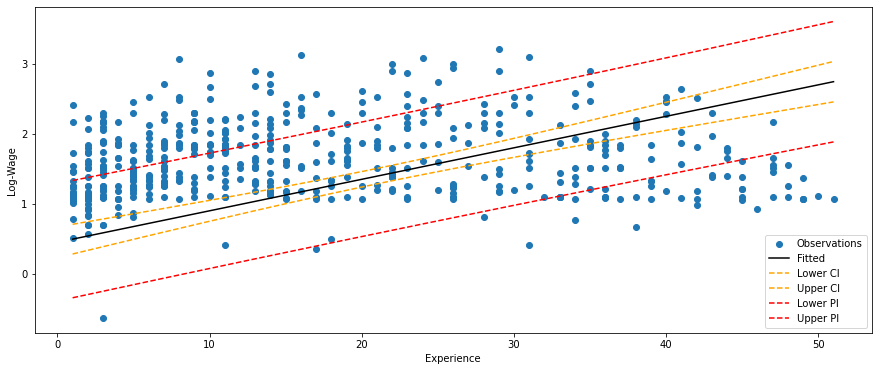

In [9]:
plt.figure(figsize = (15, 6))
plt.scatter(wage.exper, np.log(wage.wage))
plt.plot(xrange["exper"], prediction["mean"], color = "black")

plt.xlabel("Experience")
plt.ylabel("Log-Wage")

plt.plot(xrange["exper"], prediction["mean_ci_lower"], color = "orange", linestyle = '--')
plt.plot(xrange["exper"], prediction["mean_ci_upper"], color = "orange", linestyle = '--')

# prediction Intervals
plt.plot(xrange["exper"], prediction["obs_ci_lower"], color = "red", linestyle = '--')
plt.plot(xrange["exper"], prediction["obs_ci_upper"], color = "red", linestyle = '--')

plt.legend(["Observations", "Fitted", "Lower CI", "Upper CI","Lower PI", "Upper PI"])

### Generate bootstrap standard errors, and a 95% confidence interval for β2 from the regression in part (a). You may use any of the methods shown in class to generate the bootstrap CI. Based on this confidence interval, determine whether β2 is different from 0.

In [10]:
coefs = pd.DataFrame(columns = ["B2"])

for i in range(1000):
      
    sample = wage.sample(wage.shape[0] ,replace = True)
    
    w_result = smf.ols('np.log(wage) ~ educ + exper + tenure + female + married + numdep', sample).fit()

    b2 = w_result.params[2]
    
    coefs = coefs.append({"B2":b2}, ignore_index = True)

b2_u = coefs.B2.quantile(.975)

b2_l = coefs.B2.quantile(.025)

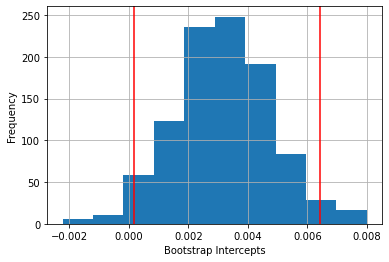

In [11]:
coefs.B2.hist()
plt.xlabel("Bootstrap Intercepts")
plt.ylabel("Frequency")
plt.axvline(b2_u, color = "red")
plt.axvline(b2_l, color = "red")

In [12]:
print("The extreme values of the CI for b2 are:", b2_l, b2_u)

The extreme values of the CI for b2 are: 0.00016188978397815618 0.006435382989588098


As 0 is not included in the interval for $ b_{2} $, we might have reliable evidence that the parameter is statistically significant. However, if we run the code multiple times, we may expect different results, with 0 included in the interval. Therefore, it is difficult to say.

### Try at least 5 different possible sub-models using Mallow’s CP. Which yielded the best result according to Mallow’s CP?

In [13]:
subdat = wage[['wage', 'educ', 'exper', 'tenure', 'female', 'married', 'numdep']].copy()

In [14]:
import itertools

model = smf.ols(formula='np.log(wage) ~ educ + exper + tenure + female + married + numdep', data=wage)
results = model.fit()
y = np.log(wage['wage'])
y_pred = results.fittedvalues

storage_cp = pd.DataFrame(columns = ["Variables", "CP"])
k = 7

for L in range(1, len(subdat.columns[1:]) + 1):
    for subset in itertools.combinations(subdat.columns[1:], L):
        
        formula1 = 'np.log(wage)~'+'+'.join(subset)
        
        result = smf.ols(formula=formula1, data=wage).fit()
        y_sub = result.fittedvalues
        p = len(subset)+1 
        
        cp = mallow.mallow(y, y_pred, y_sub, k, p)
               
        storage_cp = storage_cp.append({'Variables': subset, 'CP': cp}, ignore_index = True)

In [15]:
storage_cp.sort_values(by = "CP")

,Variables,CP
56,"(educ, exper, tenure, female, married)",5.000309
47,"(educ, tenure, female, married)",6.465083
62,"(educ, exper, tenure, female, married, numdep)",7.0
60,"(educ, tenure, female, married, numdep)",8.3484
41,"(educ, exper, tenure, female)",12.869873
...,...,...
4,"(married,)",284.48298
13,"(exper, married)",285.850191
14,"(exper, numdep)",332.524918
1,"(exper,)",337.443768


In [16]:
print("According to Mallows Cp algorithm, the best models are:\n", storage_cp.sort_values(by = "CP").head())
print("The best submodel is log(wage) = b0 + b1*educ + b3*tenure + b4*female + b5*married")

According to Mallows Cp algorithm, the best models are:
                                          Variables         CP
56          (educ, exper, tenure, female, married)   5.000309
47                 (educ, tenure, female, married)   6.465083
62  (educ, exper, tenure, female, married, numdep)        7.0
60         (educ, tenure, female, married, numdep)     8.3484
41                   (educ, exper, tenure, female)  12.869873
The best submodel is log(wage) = b0 + b1*educ + b3*tenure + b4*female + b5*married


In [17]:
sub_wreg = smf.ols('np.log(wage) ~ educ + tenure + female + married', wage)
sub_wresult = sub_wreg.fit()
sub_wresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     86.70
Date:                Sun, 30 Oct 2022   Prob (F-statistic):           1.99e-56
Time:                        20:25:47   Log-Likelihood:                -279.25
No. Observations:                 526   AIC:                             568.5
Df Residuals:                     521   BIC:                             589.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5702      0.092      6.218      0.000       0.390       0.750
educ           0.0795      0.007     12.090      0.000       0.067       0.092
tenure         0.0194      0.003      7.423      0.000       0.014       0.025
female        -0.2804      0.037     -7.527      0.000      -0.354      -0.207
married        0.1468      0.038      3.818      0.000       0.071       0.222
==============================================================================
Omnibus:                       12.344   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               22.322
Skew:                           0.075   Prob(JB):                     1.42e-05
Kurtosis:                       3.998   Cond. No.                         73.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Let's try another way**

In [18]:
model = smf.ols(formula='np.log(wage) ~ educ + exper + tenure + female + married + numdep', data=wage)
results = model.fit()
y = np.log(wage['wage'])
y_pred=results.fittedvalues

mr_sub = smf.ols(formula='np.log(wage) ~ educ + exper + tenure + female + married', data=wage)
mr_sub_fit = mr_sub.fit()
y_sub=mr_sub_fit.fittedvalues

k = 7 
p = 6 

mallow.mallow(y, y_pred,y_sub, k, p)

5.0003089148746085

In [19]:
model = smf.ols(formula='np.log(wage) ~ educ + exper + tenure + female + married + numdep', data=wage)
results = model.fit()
y = np.log(wage['wage'])
y_pred=results.fittedvalues

mr_sub = smf.ols(formula='np.log(wage) ~ educ + exper + tenure + female + numdep', data=wage)
mr_sub_fit = mr_sub.fit()
y_sub=mr_sub_fit.fittedvalues

k = 7 
p = 6 

mallow.mallow(y, y_pred,y_sub, k, p)

14.278596762829125

In [20]:
model = smf.ols(formula='np.log(wage) ~ educ + exper + tenure + female + married + numdep', data=wage)
results = model.fit()
y = np.log(wage['wage'])
y_pred=results.fittedvalues

mr_sub = smf.ols(formula='np.log(wage) ~ educ + exper + tenure + married + numdep', data=wage)
mr_sub_fit = mr_sub.fit()
y_sub=mr_sub_fit.fittedvalues

k = 7 
p = 6

mallow.mallow(y, y_pred,y_sub, k, p)

63.48977888443801

In [21]:
model = smf.ols(formula='np.log(wage) ~ educ + exper + tenure + female + married + numdep', data=wage)
results = model.fit()
y = np.log(wage['wage'])
y_pred=results.fittedvalues

mr_sub = smf.ols(formula='np.log(wage) ~ educ + exper + female + married + numdep', data=wage)
mr_sub_fit = mr_sub.fit()
y_sub=mr_sub_fit.fittedvalues

k = 7 
p = 6

mallow.mallow(y, y_pred,y_sub, k, p)

37.492648446126736

In [22]:
model = smf.ols(formula='np.log(wage) ~ educ + exper + tenure + female + married + numdep', data=wage)
results = model.fit()
y = np.log(wage['wage'])
y_pred=results.fittedvalues

mr_sub = smf.ols(formula='np.log(wage) ~ educ + tenure + female + married + numdep', data=wage)
mr_sub_fit = mr_sub.fit()
y_sub=mr_sub_fit.fittedvalues

k = 7
p = 6

mallow.mallow(y, y_pred,y_sub, k, p)

8.34839992344007

With this approach, we confirm the previous Mallow scores. The best 5 x-variables and second best sub-model is: 

$ log(wage) = b_{0} + b_{1} * educ + b_{3} * tenure + b_{4} * female + b_{5} * married + b_{6} * numdep $

In general, we can say that the best model includes all the 6 x-variables from the original regression. The model performs similarly without the variables *exper* and *numdep*. We can still have a great performance when removing *exper* only; this is our best 5 x-variables estimator for *wage*. 

In [23]:
# FOR CURIOSITY
model = smf.ols(formula='np.log(wage) ~ educ + exper + tenure + female + married + numdep', data=wage)
results = model.fit()
y = np.log(wage['wage'])
y_pred=results.fittedvalues

mr_sub = smf.ols(formula='np.log(wage) ~ exper + tenure + female + married + numdep', data=wage)
mr_sub_fit = mr_sub.fit()
y_sub=mr_sub_fit.fittedvalues

k = 7 
p = 6 

mallow.mallow(y, y_pred,y_sub, k, p)

138.03152731474142

We may notice how the score worsens when removing *educ*. This is an indicator of how much education is important in determining the salary.

### Using 5-fold cross validation, compare the RMSE of the model in (a) to the one you chose in (d). Which performs the best?

In [24]:
kf = KFold(n_splits=5)

mse = []
for train_index, test_index in kf.split(wage):
    s = ((np.log(wage.iloc[test_index]["wage"]) - wresult.predict(wage.iloc[test_index]))**2).mean()
    mse.append(s)

print(mse)

[0.24305316622257764, 0.18053567340110366, 0.14323740902768567, 0.1101637646049343, 0.16319189322412744]


In [25]:
rmse = np.sqrt(mse)
print("The RMSE for our original model is:", rmse)
print("The RMSE mean is:", rmse.mean())

The RMSE for our original model is: [0.49300423 0.4248949  0.37846718 0.33190927 0.40397016]
The RMSE mean is: 0.4064491482455998


In [26]:
kf = KFold(n_splits=5)

sub_mse = []
for train_index, test_index in kf.split(wage):
    s = ((np.log(wage.iloc[test_index]["wage"]) - sub_wresult.predict(wage.iloc[test_index]))**2).mean()
    sub_mse.append(s)

print(sub_mse)

[0.24735632581240968, 0.18132947053209889, 0.14642438618641718, 0.10991613247531455, 0.16073950446255464]


In [27]:
sub_rmse = np.sqrt(sub_mse)
print("The RMSE for our sub-model is:", sub_rmse)
print("The RMSE mean for the sub-model is:", sub_rmse.mean())

The RMSE for our sub-model is: [0.4973493  0.42582798 0.3826544  0.33153602 0.40092331]
The RMSE mean for the sub-model is: 0.4076582023938375


In [28]:
if rmse.mean()-sub_rmse.mean() < 0:
    print("On average, the original model is better")
if rmse.mean()-sub_rmse.mean() > 0:
    print("On average, the sub-model is better")
if rmse.mean()-sub_rmse.mean() == 0:
    print("On average, the models perform equally")

On average, the original model is better


## PART 2

### Use the VOTE1 dataset from the Wooldridge python module to answer the following question. Import this data into your notebook.

In [29]:
vote = woo.data("vote1")
vote.head()

,state,district,democA,voteA,expendA,expendB,prtystrA,lexpendA,lexpendB,shareA
0,AL,7,1,68,328.295990,8.737000,41,5.793916,2.167567,97.407669
1,AK,1,0,62,626.377014,402.476990,60,6.439952,5.997638,60.881039
2,AZ,2,1,73,99.607002,3.065000,55,4.601233,1.120048,97.014763
3,AZ,3,0,69,319.690002,26.281000,64,5.767352,3.268846,92.403702
4,AR,3,0,75,159.220993,60.054001,66,5.070293,4.095244,72.612473


### Consider a model with an interaction between expenditures: 
### voteA = β0 + β1prtystrA + β2expendA + β3expendB + β4expendA ∗ expendB
### What is the partial effect of expendB on voteA, holding prtystrA and expendA fixed? What is the partial effect of expendA on voteA? Is the expected sign for b4 obvious?

Partial effect of expendB on voteA: 

$ \frac{\partial voteA}{\partial expendB}=\beta_{3}+\beta _{4}expendA $

Partial effect on expendA on voteA:

$ \frac{\partial voteA}{\partial expendA}=\beta_{2}+\beta _{4}expendB $

$ b_{4} $ sign is not obvious. $ b_{3} $ will be most likely negative, as the more candidate B spends on his campaign, the less votes A receives. However, the sign of $ b_{4} $ is ambiguous. Mathematically, it should be negative, yet it has to be wondered whether the increase of B expenses has a higher effect on *voteA* than the increase of A expenditure. It has to be verified by running a regression.

### Estimate the equation in part (a) and report the results in the usual form. Is the interaction term statistically significant?

In [30]:
vreg = smf.ols('voteA ~ prtystrA + expendA + expendB + expendA*expendB', vote)
vresult = vreg.fit()
vresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  voteA   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     55.86
Date:                Sun, 30 Oct 2022   Prob (F-statistic):           6.77e-30
Time:                        20:26:16   Log-Likelihood:                -659.75
No. Observations:                 173   AIC:                             1329.
Df Residuals:                     168   BIC:                             1345.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          32.1174      4.591      6.995      0.000      23.054      41.181
prtystrA            0.3419      0.088      3.886      0.000       0.168       0.516
expendA             0.0383      0.005      7.718      0.000       0.028       0.048
expendB            -0.0317      0.005     -6.915      0.000      -0.041      -0.023
expendA:expendB -6.629e-06   7.19e-06     -0.923      0.358   -2.08e-05    7.56e-06
==============================================================================
Omnibus:                        1.031   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.597   Jarque-Bera (JB):                1.007
Skew:                          -0.004   Prob(JB):                        0.604
Kurtosis:                       2.626   Cond. No.                     1.60e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The interaction term p-value is 0.358, therefore, the coefficient cannot be considered significant.

### Find the average of expendA in the sample. Fix expendA at 300 (for 300,000). What is the estimated effect of another 100,000 spent by Candidate B on voteA? Is this a large effect?

In [31]:
print("The mean of expendA is:", vote.expendA.mean(), "which corresponds to", vote.expendA.mean()*1000, "dollars" )

The mean of expendA is: 310.6110049300111 which corresponds to 310611.0049300111 dollars


In [32]:
d_voteA_B = (vresult.params[3]+vresult.params[4]*300)*100
print(f"The effect of another 100,000 spent by B on VoteA is", d_voteA_B)

The effect of another 100,000 spent by B on VoteA is -3.371269302928471


This is a pretty large effect, especially when considering the insignificance of $ b_{4} $.

### Now fix expendB at 100. What is the estimated effect of ΔexpendA = 100 on voteA? Does this make sense?

In [33]:
d_voteA_A = (vresult.params[2]+vresult.params[4]*100)*100
print(f"The effect of another 100,000 spent by A on VoteA is", d_voteA_A)

The effect of another 100,000 spent by A on VoteA is 3.7617990628060536


This makes sense, indeed, if candidate A increases its expenditure for the votes, *voteA* is gonna increase.

### Now, estimate a model that replaces the interaction with shareA, Candidate A’s percentage share of total campaign expenditures. Does it make sense to hold both expendA and expendB fixed, while changing shareA?

In [34]:
vresult2 = smf.ols('voteA ~ prtystrA + expendA + expendB + shareA', vote).fit()
vresult2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  voteA   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     276.5
Date:                Sun, 30 Oct 2022   Prob (F-statistic):           9.03e-73
Time:                        20:26:23   Log-Likelihood:                -557.66
No. Observations:                 173   AIC:                             1125.
Df Residuals:                     168   BIC:                             1141.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.1954      2.568      7.086      0.000      13.126      23.265
prtystrA       0.1573      0.050      3.165      0.002       0.059       0.255
expendA       -0.0067      0.003     -2.354      0.020      -0.012      -0.001
expendB        0.0043      0.003      1.637      0.104      -0.001       0.009
shareA         0.4944      0.025     19.535      0.000       0.444       0.544
==============================================================================
Omnibus:                       36.148   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.238
Skew:                           0.789   Prob(JB):                     4.24e-25
Kurtosis:                       6.616   Cond. No.                     3.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

When substituting the interaction term with *shareA*, the goodness of the model is much higher;

In [35]:
print("The R^2 for the original model was:", vresult.rsquared)
print("The R^2 for the new model is:", vresult2.rsquared)

The R^2 for the original model was: 0.5708314698187538
The R^2 for the new model is: 0.868149136389488


The variable *shareA* is equal to $ shareA = \frac{expendA}{expendA+expendB} * 100 $. 

As *expendA* and *expendB* are part (fucntion) of *shareA*, it does not make any sense to keep them constant; the nominator and denominator are both fixed.

$ \frac{\partial voteA}{\partial expendB}= \beta_{3}+\beta _{4}*\frac{expendA}{(expendA+expendB)^2} $ is the derivative of the formula above for $ B_{2} $.